In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sys

In [2]:
from numpy import random

P = [(random.randn()/6, random.randn()/6) for i in range(150)]
P.extend([(random.randn()/4 + 2.5, random.randn()/5) for i in range(150)])
P.extend([(random.randn()/5 + 1, random.randn()/2 + 1) for i in range(150)])
P.extend([(i/25 - 1, + random.randn()/20 - 1) for i in range(100)])
P.extend([(i/25 - 2.5, 3 - (i/50 - 2)**2 + random.randn()/20) for i in range(150)])

In [3]:
x = [P[i][0] for i in range(len(P))]
y = [P[i][1] for i in range(len(P))]
n = len(x)
eps, minPts = 0.2, 4

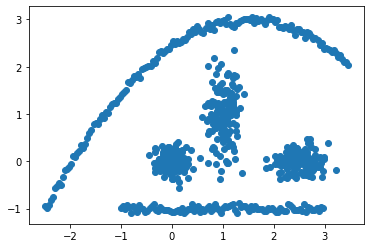

In [4]:
plt.scatter(x, y)

In [5]:
from enum import Enum 
 
class Flag(Enum): 
    GREEN = 0 
    YELLOW = 1 
    RED = 2 
    UNKNOWN = -1 

In [6]:
def dist(x1, y1, x2, y2): 
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) 

In [7]:
def neighb_count(x, y, i, eps):
    c = -1
    for j in range(len(x)): 
        if dist(x[i], y[i], x[j], y[j]) < eps: 
            c += 1
    return c

In [23]:
def dbscan(x, y, n, eps, minPts):
    flags = [] 
    for i in range(n): 
        neighb = neighb_count(x, y, i, eps)
        if neighb >= minPts: 
            flags.append(Flag.GREEN.value) 
        else: 
            flags.append(Flag.UNKNOWN.value) 

    for i in range(n): 
        if flags[i] == Flag.UNKNOWN.value: 
            for j in range(n): 
                if flags[j] == Flag.GREEN.value and dist(x[i],y[i],x[j],y[j]) < eps: 
                    flags[i] = Flag.YELLOW.value 
                    break 
        if flags[i] == Flag.UNKNOWN.value: 
            flags[i] = Flag.RED.value 
    clusters = np.zeros(n) 
    cl = 1 

    for i in range(n):                    
        if flags[i] == Flag.GREEN.value: 
            if clusters[i] == 0: 
                clusters[i] = cl 
                cl += 1 
            for j in range(n): 
                d = dist(x[i], y[i], x[j], y[j])
                if flags[j] == Flag.GREEN.value:
                    if d < eps:
                        clusters[j] = clusters[i] 
                if flags[j] == Flag.YELLOW.value:
                    if d < eps and d == min(dist(x[j], y[j], x[m], y[m]) for m in range(n) if flags[m] == Flag.GREEN.value):
                        clusters[j] = clusters[i] 
    return clusters

In [24]:
clusters = dbscan(x, y, n, eps, minPts)

In [25]:
import seaborn as sns
def draw_clusters(x, y, clusters, n):
    df = pd.DataFrame(columns={'x', 'y', 'clusters'})
    df['x'] = [x[i] for i in range(n) if clusters[i] != 0]
    df['y'] = [y[i] for i in range(n) if clusters[i] != 0]
    df['clusters'] = [clusters[i] for i in range(n) if clusters[i] != 0]
    x_r = [x[i] for i in range(n) if clusters[i] == 0]
    y_r = [y[i] for i in range(n) if clusters[i] == 0]
    facet = sns.lmplot(data=df, x='x', y='y', hue='clusters', 
                   fit_reg=False, legend=True, legend_out=True)
    plt.scatter(x_r, y_r, c='r')

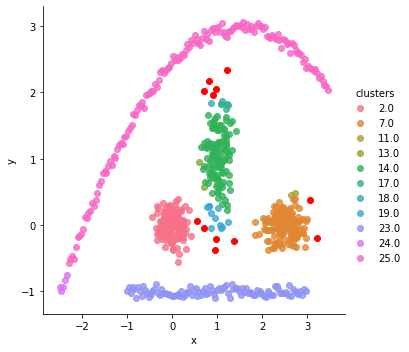

In [26]:
draw_clusters(x, y, clusters, n)

In [39]:
n, eps, min_sam = 100, 16, 4

x = np.random.randint(1, 100, n)
y = np.random.randint(1, 100, n)

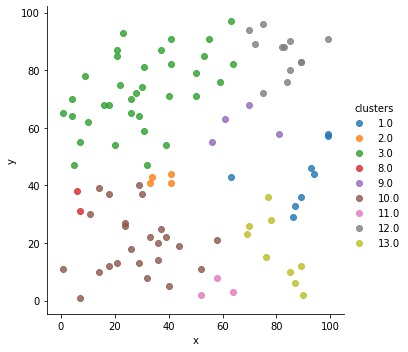

In [40]:
clusters = dbscan(x, y, n, eps, minPts)
draw_clusters(x, y, clusters, n)